<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/Dimensional_reduction_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

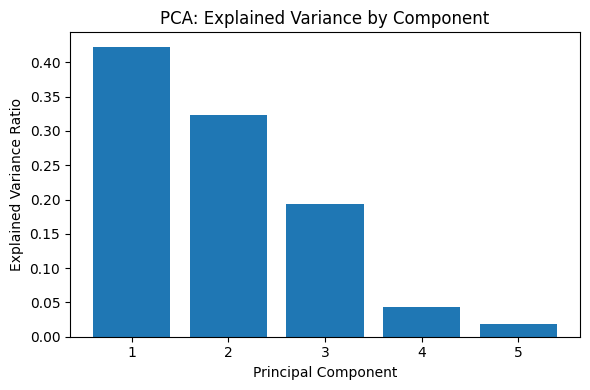

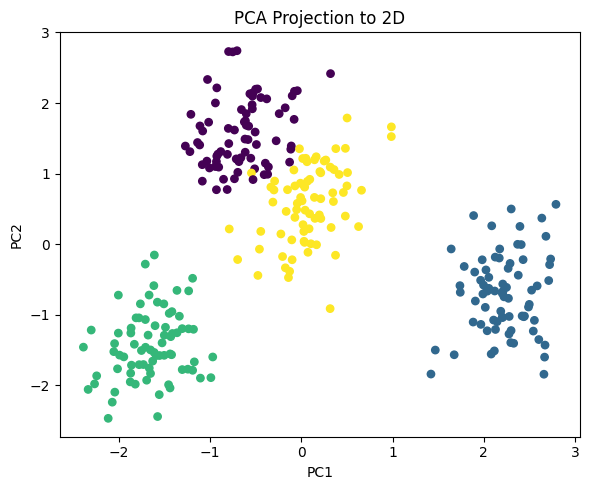

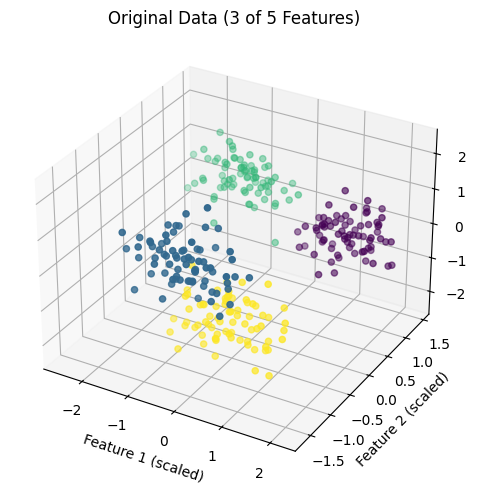

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


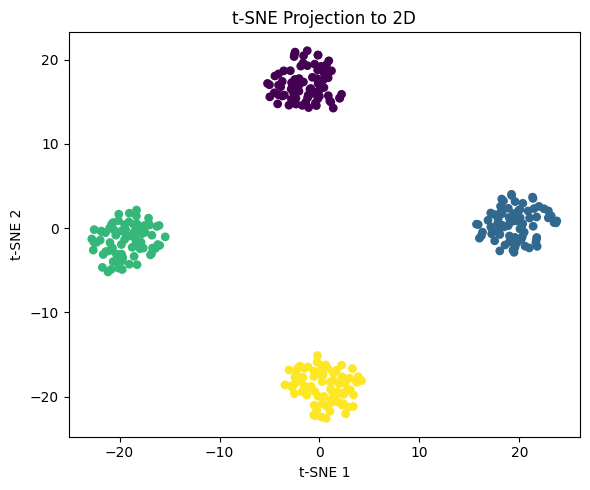

PCA (2D) cumulative explained variance: 74.51%
Top-3 component variances (full PCA): [0.423 0.323 0.193]


In [1]:
# Dimensionality Reduction Demo (static, no interactivity)
# - Generates a synthetic high-dimensional dataset
# - Applies PCA for 2D projection + variance explained chart
# - Runs a lightweight t-SNE for structure visualization
# - Produces each chart in its own figure (no subplots)
#
# Notes:
# - Uses only matplotlib (no seaborn)
# - Does not set any specific colors
# - Keeps runtime modest to avoid timeouts

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1) Generate a synthetic 5D dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, n_features=5, cluster_std=1.6, random_state=42)

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) PCA: fit full PCA to inspect explained variance across all 5 components
pca_full = PCA(n_components=5, random_state=42)
X_pca_full = pca_full.fit_transform(X_scaled)

# Plot: Explained variance ratio
plt.figure(figsize=(6, 4))
components = np.arange(1, 6)
plt.bar(components, pca_full.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA: Explained Variance by Component")
plt.tight_layout()
plt.show()

# 3) PCA to 2D for visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot: PCA 2D projection
plt.figure(figsize=(6, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, s=28)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection to 2D")
plt.tight_layout()
plt.show()

# 4) Optional: show a 3D view of three original (standardized) features for reference
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, s=20)
ax.set_xlabel("Feature 1 (scaled)")
ax.set_ylabel("Feature 2 (scaled)")
ax.set_zlabel("Feature 3 (scaled)")
ax.set_title("Original Data (3 of 5 Features)")
plt.tight_layout()
plt.show()

# 5) Lightweight t-SNE (reduced iterations to keep it snappy)
#    t-SNE focuses on preserving local neighborhoods, helpful for clusters
tsne = TSNE(n_components=2, perplexity=30, n_iter=600, learning_rate="auto", random_state=42, init="pca")
X_tsne = tsne.fit_transform(X_scaled)

# Plot: t-SNE 2D projection
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=28)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Projection to 2D")
plt.tight_layout()
plt.show()

# 6) Print a brief textual summary in the notebook output
print("PCA (2D) cumulative explained variance: {:.2f}%".format(
    100 * np.sum(pca_2d.explained_variance_ratio_)
))
print("Top-3 component variances (full PCA):", np.round(pca_full.explained_variance_ratio_[:3], 3))
